In [1]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from PIL import Image
import io
import numpy as np

In [2]:
url = 'http://www.boeungketfc.com/archives/category/club'
r = requests.get(url)
r.text[:100]

'<!DOCTYPE html\r\n\tPUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n"http://www.w3.org/TR/xhtml1/DTD/xhtml1-'

In [3]:
s = BeautifulSoup(r.text, 'lxml') #xml file is similar as json 
type(s)

bs4.BeautifulSoup

In [4]:
print(s.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html lang="en-US" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#" xmlns:og="http://ogp.me/ns#">
 <head profile="http://gmpg.org/xfn/11">
  <title>
   Boeung Ket Football Club
  </title>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <link href="https://fonts.googleapis.com/css?family=Hanuman" rel="stylesheet" type="text/css"/>
  <link href="http://static.hupso.com/share/js/share_toolbar.js" rel="dns-prefetch"/>
  <link href="http://static.hupso.com/share/js/share_toolbar.js" rel="preconnect"/>
  <link href="http://static.hupso.com/share/js/share_toolbar.js" rel="preload"/>
  <meta content="http://www.boeungketfc.com/wp-content/uploads/2018/09/fearhiring-300x200.png" property="og:image"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link crossorigin="" href="https://app.ecwid

In [11]:
members = s.find_all("div", {"class": "club-member-profile player-profile"})


In [6]:
print(len(members))
print(type(members))


55
<class 'bs4.element.ResultSet'>


In [7]:
members[0]

<div class="club-member-profile player-profile">
<a class="category-title" href="http://www.boeungketfc.com/archives/player_club/kimhuy" onclick="return true">
<div class="club-member-profile-image">
<img class="img-responsive" src="http://www.boeungketfc.com/wp-content/uploads/2018/10/Kimhuy.jpg"/>
</div>
<div class="club-member-profile-description">
<h4 class="club-player-number-profile">1</h4> <h5 class="club-player-en-name-profile">HUL KIM HUY
        <h5 class="club-player-kh-name-profile">ហ៊ុល គឹមហ៊ុយ
              </h5></h5></div>
</a>
</div>

In [8]:
members[0].select_one('a')['href']
link_lst = []
for i in range(len(members)):
    link_lst.append(members[i].select_one('a')['href'])

In [9]:
print(members[0].select_one('h4.club-player-number-profile'))
player_num=[]
for i in range(len(members)):
    if members[i].select_one('h4.club-player-number-profile')!=None:
        player_num.append(members[i].select_one('h4.club-player-number-profile').text)
    else:
        player_num.append(None)
        
player_num

<h4 class="club-player-number-profile">1</h4>


['1',
 '31',
 '13',
 '2',
 '3',
 '4',
 '6',
 '23',
 '28',
 '5',
 None,
 '71',
 '8',
 '15',
 '17',
 '20',
 '24',
 '21',
 '26',
 '25',
 '27',
 '7',
 '22',
 '9',
 '10',
 '11',
 '14',
 '18',
 '44',
 '1',
 '24',
 '31',
 '32',
 '36',
 '2',
 '3',
 '4',
 '5',
 '6',
 '12',
 '13',
 '14',
 '23',
 '26',
 '7',
 '8',
 '15',
 '16',
 '19',
 '20',
 '9',
 '10',
 '11',
 '17',
 '22']

In [13]:
#print(members[0].select_one('h5.club-player-en-name-profile'))
import re
k = members[0].select_one('h5.club-player-en-name-profile').text.split()
print( [i.isalpha() for i in k] )
player_name = []
dum_name = ''
for i in range(len(members)):
    name = members[i].select_one('h5.club-player-en-name-profile').text
    player_name.append(name)
    
res = [idx for idx in player_name if not re.findall("[^\u0000-\u05C0\u2100-\u214F]+", idx)]
res

[True, True, True, False, False]


['TAHER JAHANBAKHSH\n        \n',
 'ZOGBE GBAYORO ANDERSON\n        \n',
 'CARDOSO CARCIA ALEXANDRE\n        \n',
 'MUSTAFA ZAZAI\n        \n',
 'AJAYI OPEYEMI KOREDE\n        \n',
 'TUKIAINEN SAKARI\n        \n']

In [14]:

loweralphabets="abcdefghijklmnopqrstuvwxyz"
upperalphabets="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
x=loweralphabets+upperalphabets
res=[]
for i in player_name:
    a=""
    for j in i:
        if j in x:
            a+=j
    res.append(a)
             
# printing result
player_name = res
player_name

['HULKIMHUY',
 'KOYSALIM',
 'SuoSovanneath',
 'SLEHSEN',
 'SATHROSIB',
 'LYVAHED',
 'SOEUTHNAVA',
 'TANGBUNCHHAI',
 'CHHORPAON',
 'TAHERJAHANBAKHSH',
 'ZOGBEGBAYOROANDERSON',
 'POMBARANG',
 'CHEAVESLY',
 'SANKIMHENG',
 'LYMIZAN',
 'VANGDAVIN',
 'SAOVIAFY',
 'MOHAMATHARYFIN',
 'EMPHANNA',
 'CARDOSOCARCIAALEXANDRE',
 'LIMAARUNRAYMOND',
 'MUSTAFAZAZAI',
 'AJAYIOPEYEMIKOREDE',
 'SIENGCHANTHEA',
 'MATNORON',
 'CHANVATHANAKA',
 'OURPHEARON',
 'OEUNNITHSATHYA',
 'TUKIAINENSAKARI',
 'SOURENSOPHEAK',
 'TOUCHMANAN',
 'SEMCHANVICHET',
 'YORNSAMNANG',
 'CHIVSRUNCHHENG',
 'YOUMESA',
 'RESSLEMAN',
 'RATANAKMONY',
 'ROSETHAFINY',
 'MONPICH',
 'CHAIDEVID',
 'SRUNDARO',
 'SRUNSENGHONG',
 'KAYHENGLY',
 'UMPISETH',
 'HAILEANGHONG',
 'MOHAMADARIFIN',
 'PHEAPSOPHANNA',
 'NYPANHA',
 'EMPHORLNITH',
 'ARIFINVANNY',
 'TINSORLYHIN',
 'LEAVPRACHSOMBO',
 'CHOEUNPISAKBORAMEY',
 'NYSAKIRIN',
 'LYSMAEL']

In [15]:
members[0]

<div class="club-member-profile player-profile">
<a class="category-title" href="http://www.boeungketfc.com/archives/player_club/kimhuy" onclick="return true">
<div class="club-member-profile-image">
<img class="img-responsive" src="http://www.boeungketfc.com/wp-content/uploads/2018/10/Kimhuy.jpg"/>
</div>
<div class="club-member-profile-description">
<h4 class="club-player-number-profile">1</h4> <h5 class="club-player-en-name-profile">HUL KIM HUY
        <h5 class="club-player-kh-name-profile">ហ៊ុល គឹមហ៊ុយ
              </h5></h5></div>
</a>
</div>

In [16]:
members[0].select_one('img')['src']

'http://www.boeungketfc.com/wp-content/uploads/2018/10/Kimhuy.jpg'

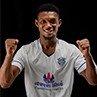

In [17]:
r1 = requests.get(members[10].select_one('img')['src'])
img = Image.open(io.BytesIO(r1.content))
imgr1 = requests.get(members[10].select_one('img')['src'])
img = Image.open(io.BytesIO(r1.content))
img

In [18]:
members[0].select_one('a')['href']

'http://www.boeungketfc.com/archives/player_club/kimhuy'

In [20]:
image_url = []
player_link = []
for i in members:
    mem_img_url = i.select_one('img')['src']
    mem_link = i.select_one('a')['href']
    image_url.append(mem_img_url)
    player_link.append(mem_link)
player_link

['http://www.boeungketfc.com/archives/player_club/kimhuy',
 'http://www.boeungketfc.com/archives/player_club/ly_somet',
 'http://www.boeungketfc.com/archives/player_club/suo-sovanneath',
 'http://www.boeungketfc.com/archives/player_club/nava',
 'http://www.boeungketfc.com/archives/player_club/sath-rozib',
 'http://www.boeungketfc.com/archives/player_club/ly-vahed-2',
 'http://www.boeungketfc.com/archives/player_club/choung-makara',
 'http://www.boeungketfc.com/archives/player_club/hort-chhenchen',
 'http://www.boeungketfc.com/archives/player_club/darongrith-pisethchhorpaon',
 'http://www.boeungketfc.com/archives/player_club/zabihi-taher-jahanbakhsh',
 'http://www.boeungketfc.com/archives/player_club/zogbe-gbayoro-anderson',
 'http://www.boeungketfc.com/archives/player_club/pom-barang',
 'http://www.boeungketfc.com/archives/player_club/chea-vesly-2',
 'http://www.boeungketfc.com/archives/player_club/san-kim-heng',
 'http://www.boeungketfc.com/archives/player_club/seng-thai',
 'http://ww

In [21]:
df = pd.DataFrame(data = {'Name':player_name, 'Number':player_num, 'Ímage URL':image_url, 'Link':player_link})
df

,Name,Number,Ímage URL,Link
0,HULKIMHUY,1,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...
1,KOYSALIM,31,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...
2,SuoSovanneath,13,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...
3,SLEHSEN,2,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...
4,SATHROSIB,3,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...
5,LYVAHED,4,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...
6,SOEUTHNAVA,6,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...
7,TANGBUNCHHAI,23,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...
8,CHHORPAON,28,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...
9,TAHERJAHANBAKHSH,5,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...


In [22]:
from IPython.display import HTML

In [23]:
def to_html_img(url, alt=None, width=100):
    if alt==None:
        alt=''
    return f'<img alt="{alt}" src="{url}" width="{width}"/>'

In [24]:
to_html_img(image_url[0])

'<img alt="" src="http://www.boeungketfc.com/wp-content/uploads/2018/10/Kimhuy.jpg" width="100"/>'

In [25]:
html_img = []
for i in image_url:
    html_img.append(to_html_img(i))
df['Img'] = html_img
df

,Name,Number,Ímage URL,Link,Img
0,HULKIMHUY,1,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...,"<img alt="""" src=""http://www.boeungketfc.com/wp..."
1,KOYSALIM,31,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...,"<img alt="""" src=""http://www.boeungketfc.com/wp..."
2,SuoSovanneath,13,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...,"<img alt="""" src=""http://www.boeungketfc.com/wp..."
3,SLEHSEN,2,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...,"<img alt="""" src=""http://www.boeungketfc.com/wp..."
4,SATHROSIB,3,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...,"<img alt="""" src=""http://www.boeungketfc.com/wp..."
5,LYVAHED,4,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...,"<img alt="""" src=""http://www.boeungketfc.com/wp..."
6,SOEUTHNAVA,6,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...,"<img alt="""" src=""http://www.boeungketfc.com/wp..."
7,TANGBUNCHHAI,23,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...,"<img alt="""" src=""http://www.boeungketfc.com/wp..."
8,CHHORPAON,28,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...,"<img alt="""" src=""http://www.boeungketfc.com/wp..."
9,TAHERJAHANBAKHSH,5,http://www.boeungketfc.com/wp-content/uploads/...,http://www.boeungketfc.com/archives/player_clu...,"<img alt="""" src=""http://www.boeungketfc.com/wp..."


In [26]:
HTML(df[['Name', 'Number', 'Img']].to_html(escape=False))

,Name,Number,Img
0,HULKIMHUY,1,
1,KOYSALIM,31,
2,SuoSovanneath,13,
3,SLEHSEN,2,
4,SATHROSIB,3,
5,LYVAHED,4,
6,SOEUTHNAVA,6,
7,TANGBUNCHHAI,23,
8,CHHORPAON,28,
9,TAHERJAHANBAKHSH,5,


In [27]:
def to_html_a(url,text):
    if text==None:
        text=''
    return f'<a href ="{url}">{text}</a>'
a = []
for i in range(len(image_url)):
    j = player_link[i]
    k = image_url[i]
    a.append(to_html_a(j, k))
a

['<a href ="http://www.boeungketfc.com/archives/player_club/kimhuy">http://www.boeungketfc.com/wp-content/uploads/2018/10/Kimhuy.jpg</a>',
 '<a href ="http://www.boeungketfc.com/archives/player_club/ly_somet">http://www.boeungketfc.com/wp-content/uploads/2016/07/Salim.jpg</a>',
 '<a href ="http://www.boeungketfc.com/archives/player_club/suo-sovanneath">http://www.boeungketfc.com/wp-content/uploads/2022/05/Neath.jpg</a>',
 '<a href ="http://www.boeungketfc.com/archives/player_club/nava">http://www.boeungketfc.com/wp-content/uploads/2018/10/Sen.jpg</a>',
 '<a href ="http://www.boeungketfc.com/archives/player_club/sath-rozib">http://www.boeungketfc.com/wp-content/uploads/2018/10/Rosib.jpg</a>',
 '<a href ="http://www.boeungketfc.com/archives/player_club/ly-vahed-2">http://www.boeungketfc.com/wp-content/uploads/2018/07/Vahed.jpg</a>',
 '<a href ="http://www.boeungketfc.com/archives/player_club/choung-makara">http://www.boeungketfc.com/wp-content/uploads/2016/07/Nava.jpg</a>',
 '<a href ="h

In [35]:
df['a'] = a

In [29]:
HTML(df[['Name', 'Number', 'Img', 'a']].to_html(escape=0))

,Name,Number,Img,a
0,HULKIMHUY,1,,http://www.boeungketfc.com/wp-content/uploads/2018/10/Kimhuy.jpg
1,KOYSALIM,31,,http://www.boeungketfc.com/wp-content/uploads/2016/07/Salim.jpg
2,SuoSovanneath,13,,http://www.boeungketfc.com/wp-content/uploads/2022/05/Neath.jpg
3,SLEHSEN,2,,http://www.boeungketfc.com/wp-content/uploads/2018/10/Sen.jpg
4,SATHROSIB,3,,http://www.boeungketfc.com/wp-content/uploads/2018/10/Rosib.jpg
5,LYVAHED,4,,http://www.boeungketfc.com/wp-content/uploads/2018/07/Vahed.jpg
6,SOEUTHNAVA,6,,http://www.boeungketfc.com/wp-content/uploads/2016/07/Nava.jpg
7,TANGBUNCHHAI,23,,http://www.boeungketfc.com/wp-content/uploads/2016/07/Bunchhai.jpg
8,CHHORPAON,28,,http://www.boeungketfc.com/wp-content/uploads/2022/05/Chorpoan.jpg
9,TAHERJAHANBAKHSH,5,,http://www.boeungketfc.com/wp-content/uploads/2022/05/Taher.jpg


In [33]:
df['a2'] = df.apply(lambda r: to_html_a(r['Link'], r['Name']),axis=1)

In [37]:
HTML(df[['Number','a2', 'Img']].to_html(escape=0))

,Number,a2,Img
0,1,HULKIMHUY,
1,31,KOYSALIM,
2,13,SuoSovanneath,
3,2,SLEHSEN,
4,3,SATHROSIB,
5,4,LYVAHED,
6,6,SOEUTHNAVA,
7,23,TANGBUNCHHAI,
8,28,CHHORPAON,
9,5,TAHERJAHANBAKHSH,
